In [ ]:
import pandas as pd
import ssl
import matplotlib.pyplot as plt

Seaborn is a [style of graph used by MatPlotLib](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html).
Creating a unverified context prevents errors in some contexts. So if you're having issues, uncomment that line.

In [ ]:
plt.style.use('seaborn')
# ssl._create_default_https_context = ssl._create_unverified_context

This function takes in the dataframe as well as the number of days and outputs the various graphs.

To change the graphs, change the y variable to what you'd like the graph to show. Multiple values can be shown on the same graph by passing them in as a list.


In [ ]:
def print_graphs(df, days):
  
    plt = df.head(days).plot(kind='line', x='date', y=['death', ])
    plt.legend(prop={'size': 15})
    plt.get_figure().savefig('deaths.png')


    plt = df.head(days).plot(kind='line', x='date', y=['positive', ])
    plt.legend(prop={'size': 15})
    plt.get_figure().savefig('positives.png')

    plt = df.head(days).plot(kind='line', x='date', y=['hospitalizedCurrently', ])
    plt.legend(prop={'size': 15,})
    plt.get_figure().savefig('hospitalizations.png')

    plt = df.head(days).plot(kind='line', x='date', y=['positive', 'recovered', 'death'])
    plt.legend(prop={'size': 15})
    plt.get_figure().savefig('multi.png')

To see your state's numbers, input the 2 letter abbreviation down below. (Ex: ny, ga, ca, tx, etc.)


In [ ]:
YOUR_STATE_ABBREVIATION = 'ny'


This block gets the dataframe from the url. The data is coming from [covidtracking.com](https://covidtracking.com/). If you're looking for a different set of data, check out [their API](https://covidtracking.com/data/api).
To get stats for the entire US, uncomment the first line and comment the second one.

In [ ]:
YOUR_STATE_ABBREVIATION = YOUR_STATE_ABBREVIATION.upper()

# url = 'https://api.covidtracking.com/v1/us/daily.csv'
url = f'https://api.covidtracking.com/v1/states/{YOUR_STATE_ABBREVIATION}/daily.csv'

df = pd.read_csv(url, parse_dates=['date'])

This block generates the graphs using the dataframe from the previous block and 14 days as the default. To see a larger set of data, simply change the number of days.

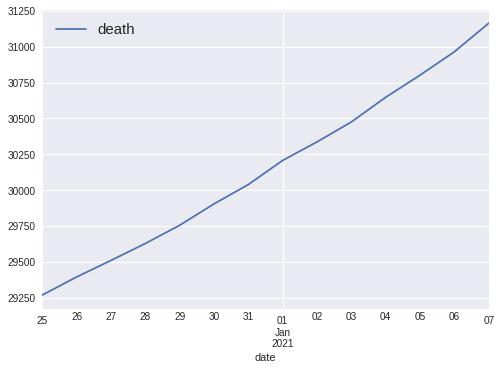

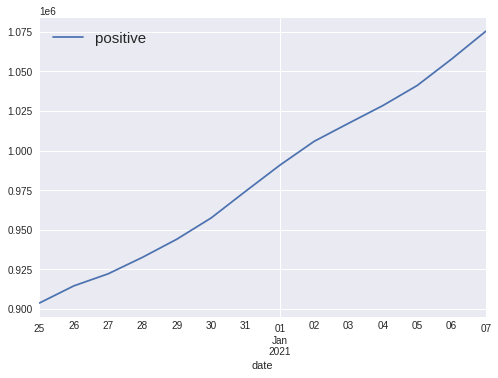

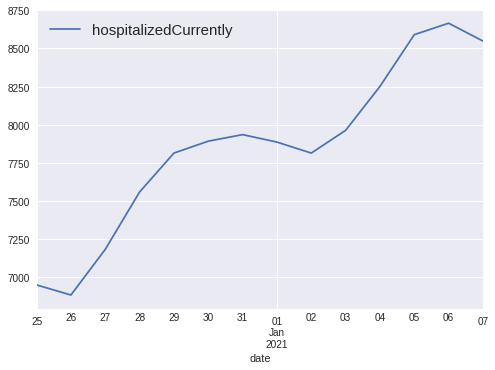

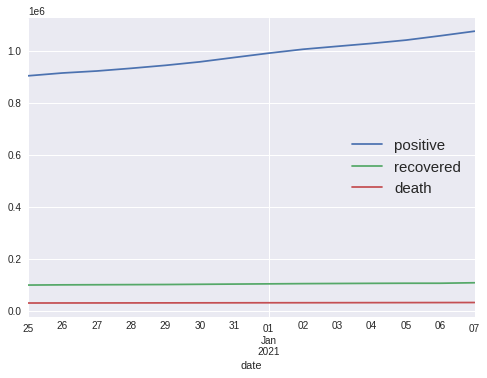

In [ ]:
print_graphs(df, 14)

This block simply prints out some information about the COVID data that was fetched. Remember if you decided to use the entire US's data up above, these numbers will be for the entire US, not for the state you selected.

In [ ]:
print(
    f'{int(df.head(1).positiveIncrease)} people in {YOUR_STATE_ABBREVIATION} tested positive yesterday and {int(df.head(1).negativeIncrease)} tested negative')
if int(df.head(1).deathIncrease == 1):
    print(f'{int(df.head(1).deathIncrease)} person in {YOUR_STATE_ABBREVIATION} died of COVID-19 yesterday.')
else:
    print(f'{int(df.head(1).deathIncrease)} people in {YOUR_STATE_ABBREVIATION} died of COVID-19 yesterday.')
if int(df.head(1).hospitalizedIncrease) == 0:
    print(f'Yesterday there was no change in the number of hospitalizations in {YOUR_STATE_ABBREVIATION}.')
elif int(df.head(1).hospitalizedIncrease) < 0:
    print(f'Yesterday there was a {int(df.head(1).hospitalizedIncrease)} person DECREASE in the number of hospitalizations in {YOUR_STATE_ABBREVIATION}.')
elif int(df.head(1).hospitalizedIncrease) > 0:
    print(f'Yesterday there was a {int(df.head(1).hospitalizedIncrease)} person increase in the number of hospitalizations in {YOUR_STATE_ABBREVIATION}.')


17636 people in NY tested positive yesterday and 220914 tested negative
199 people in NY died of COVID-19 yesterday.
Yesterday there was no change in the number of hospitalizations in NY.
